In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('electricity_bill.csv')

# Split the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

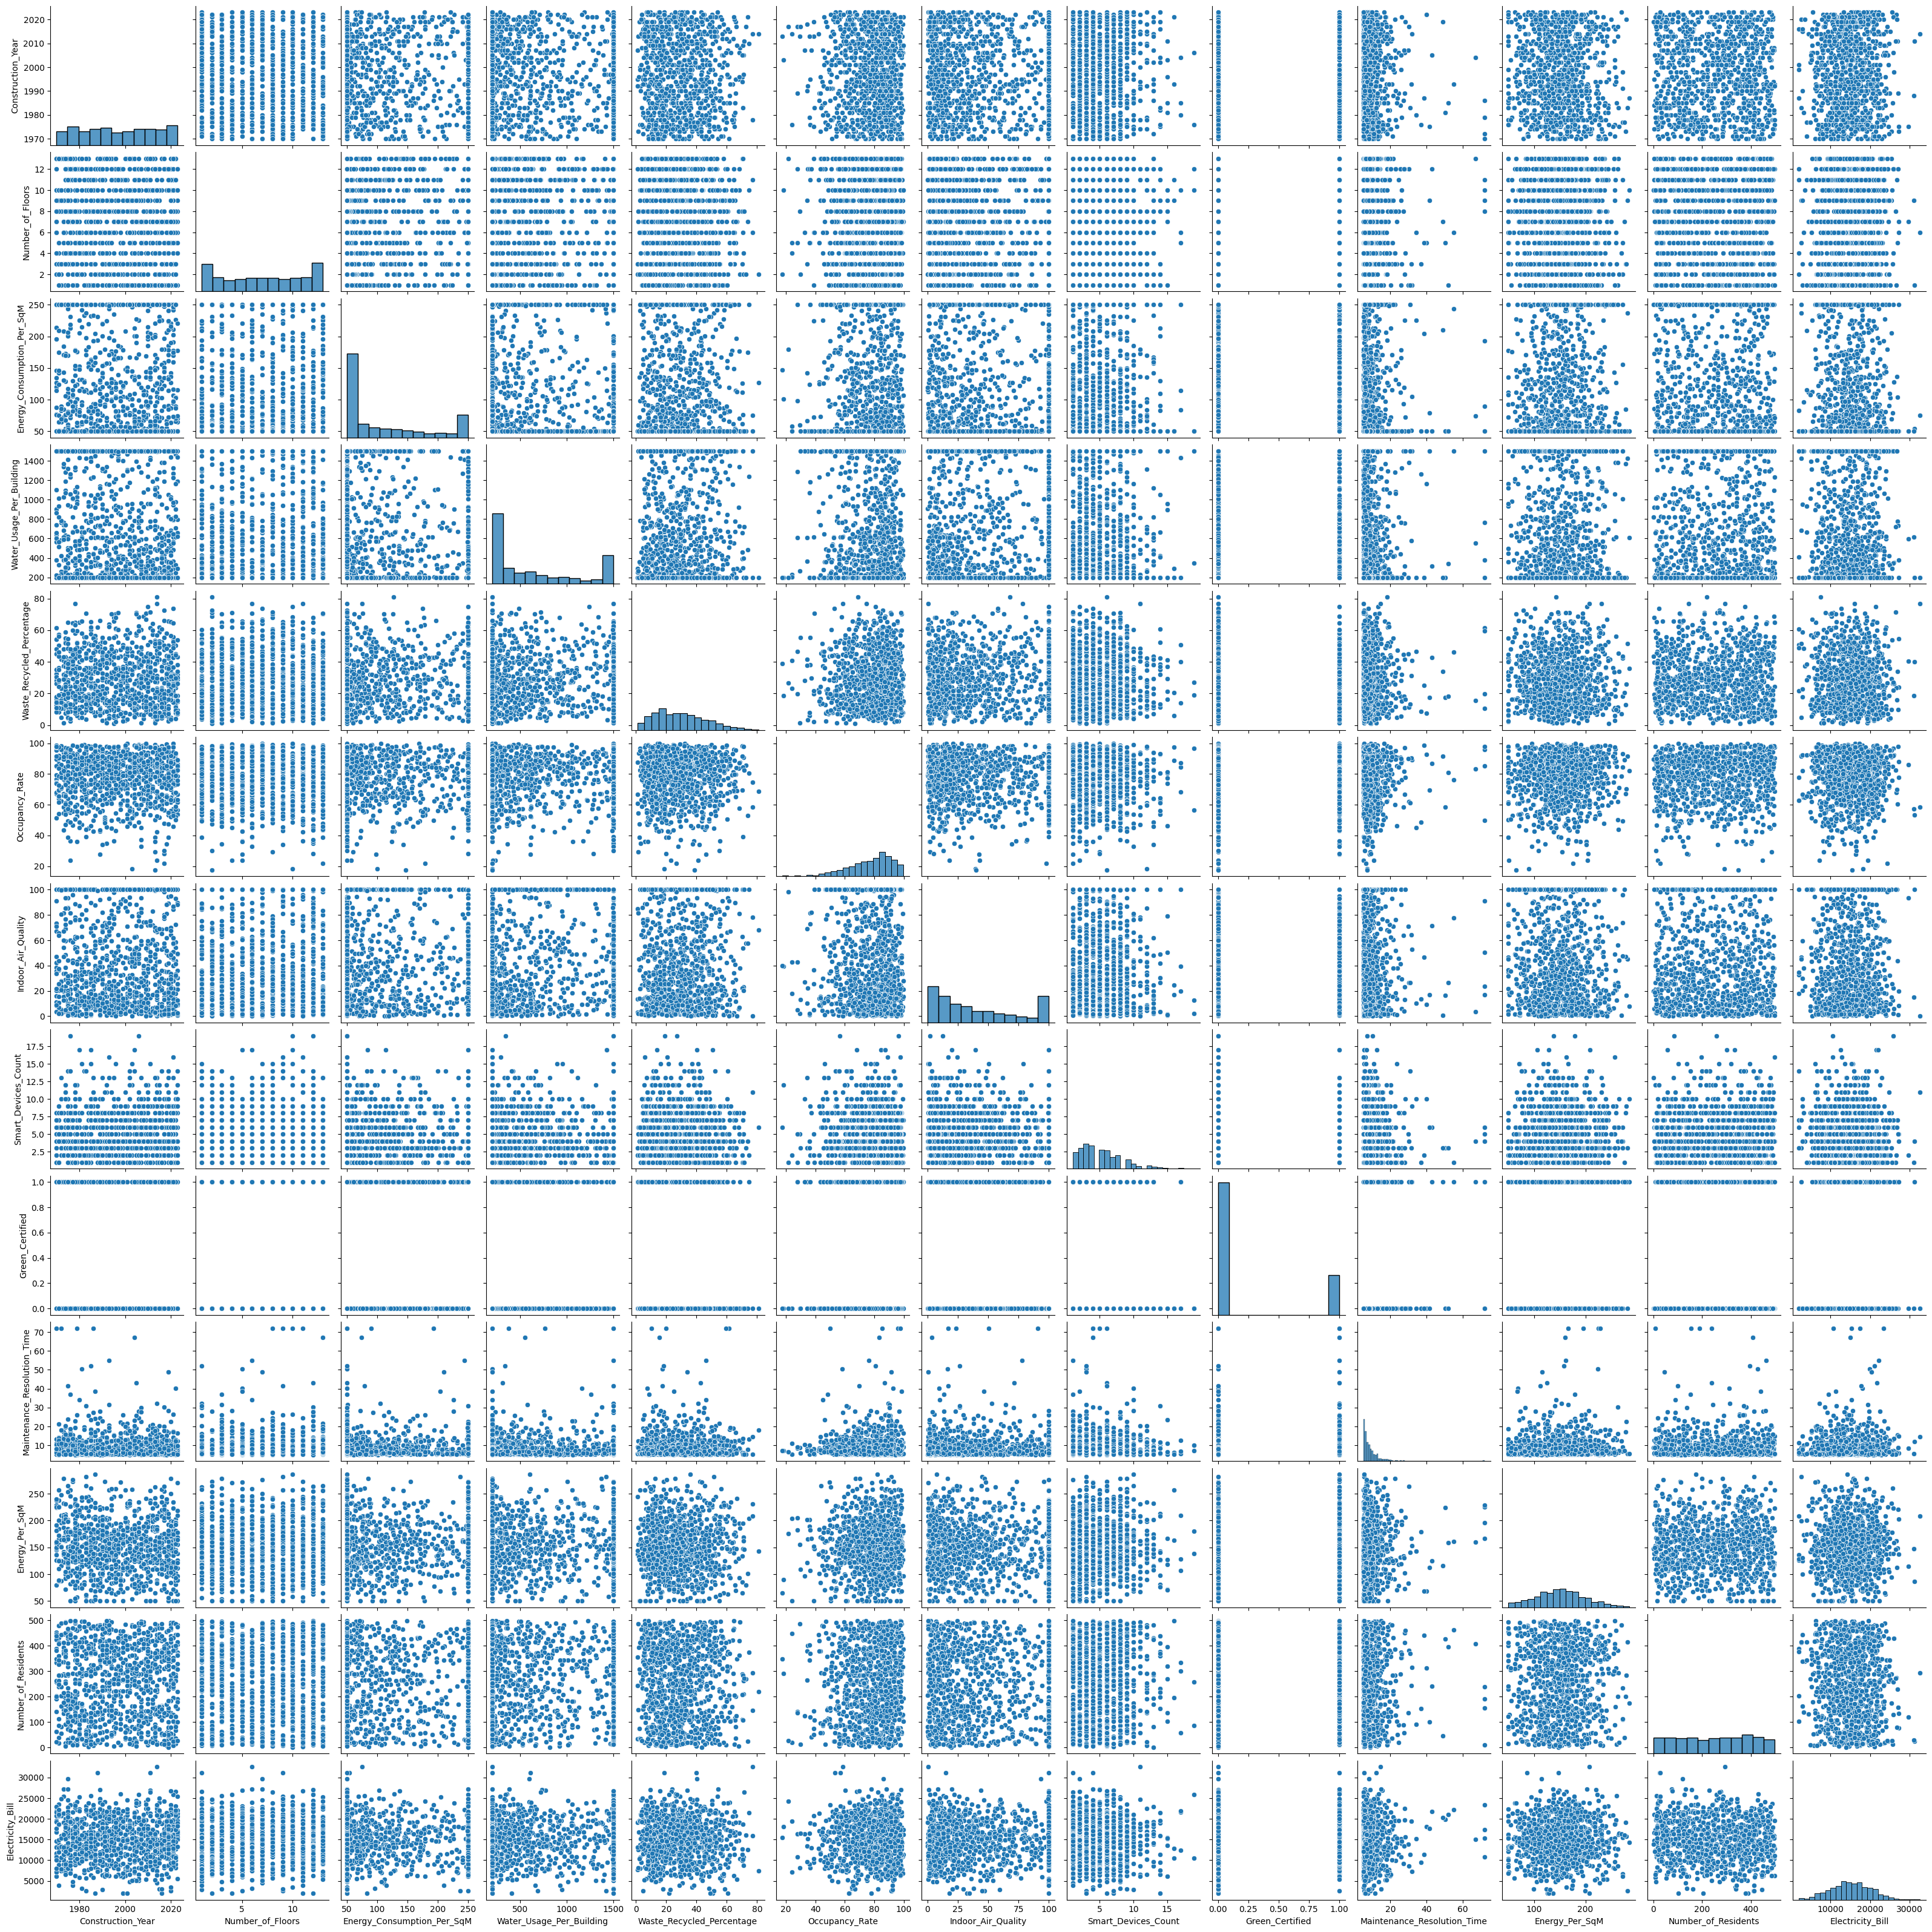

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships between features
sns.pairplot(train_df)
plt.show()

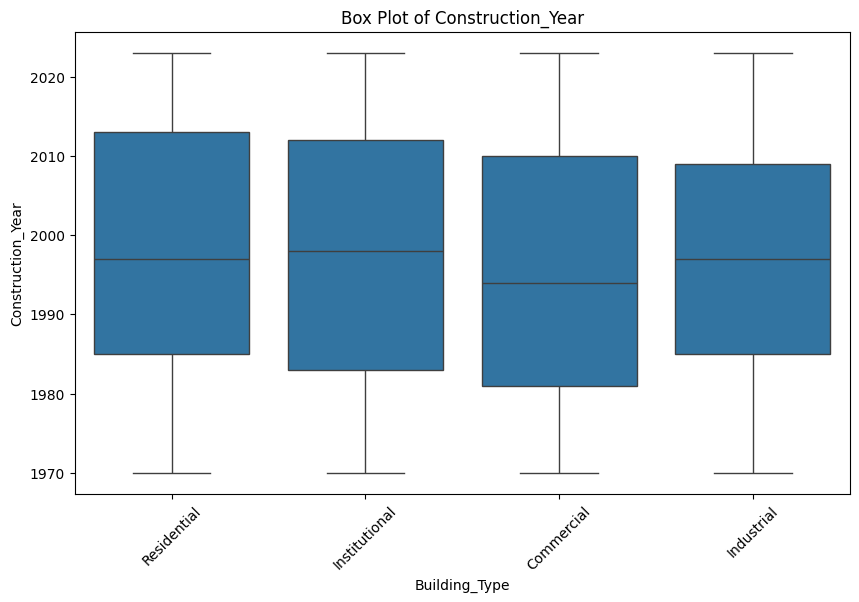

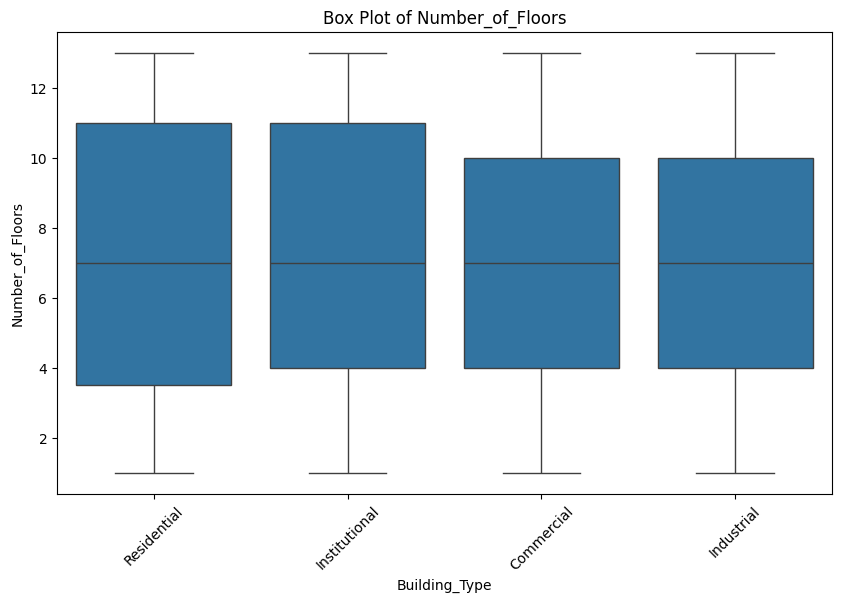

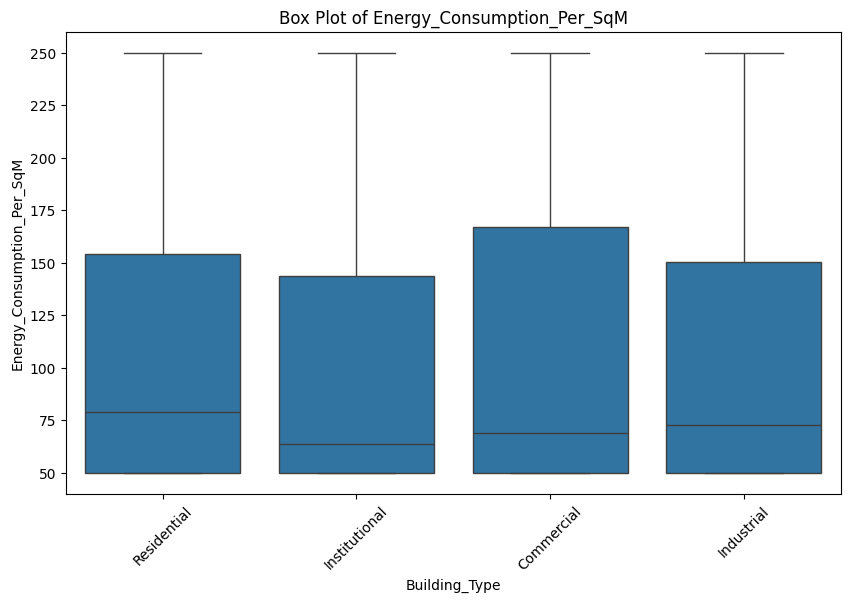

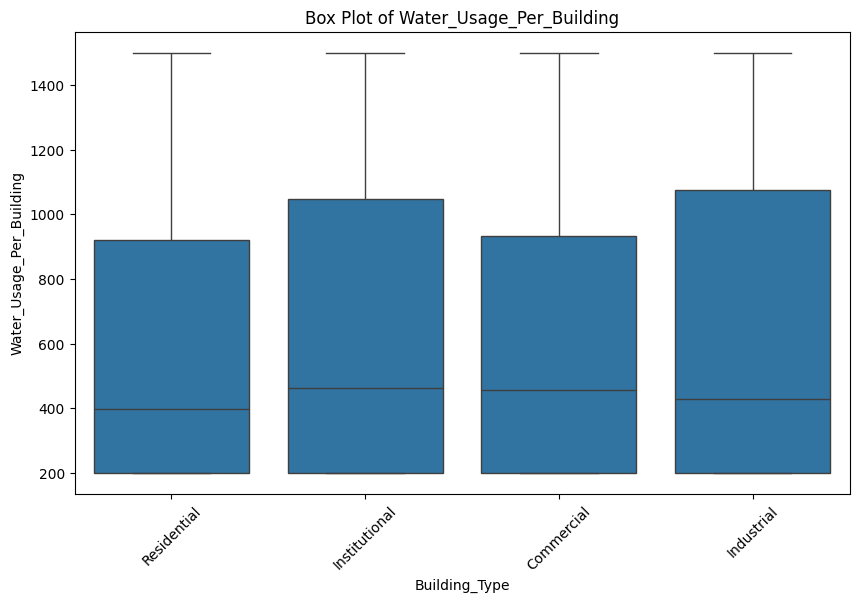

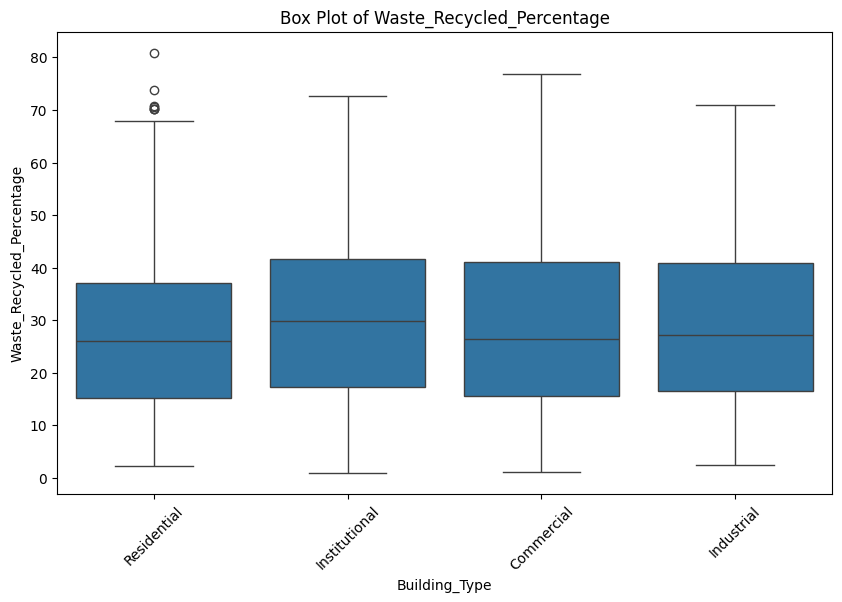

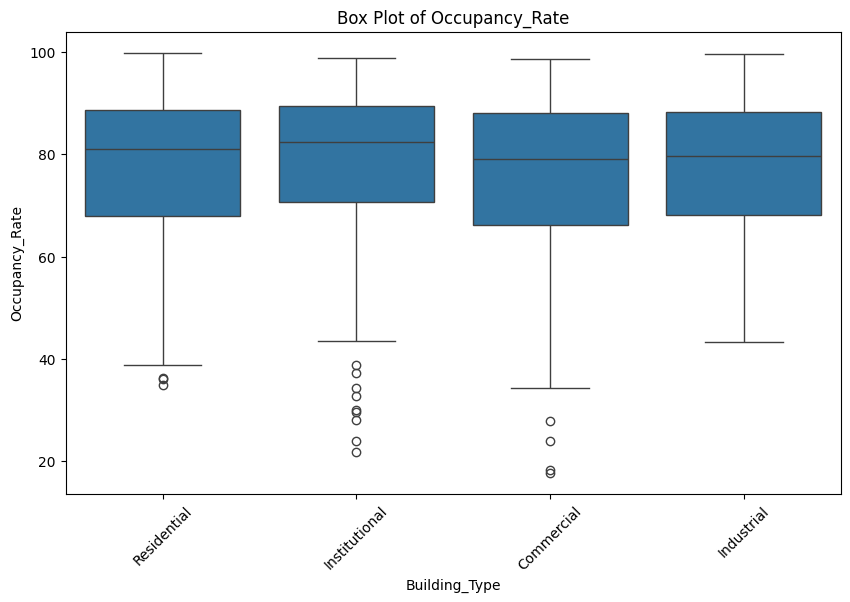

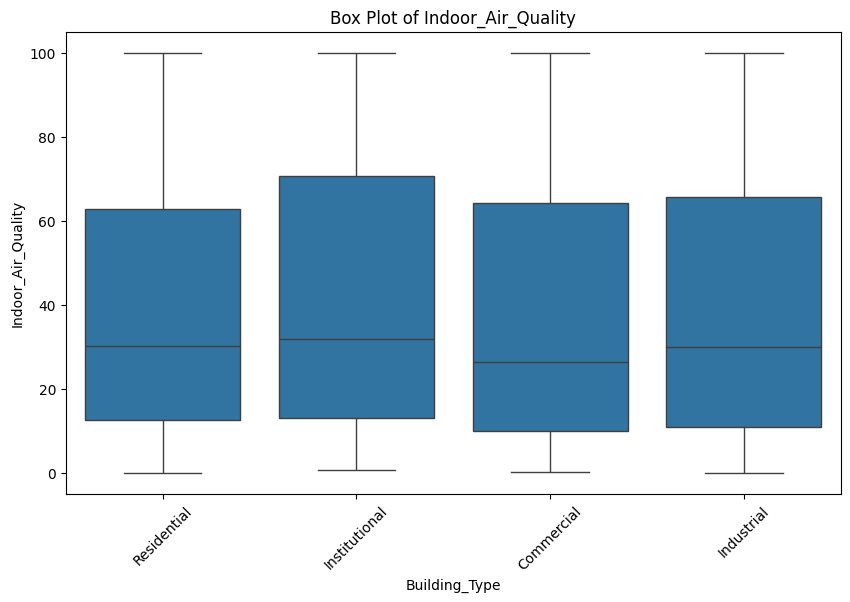

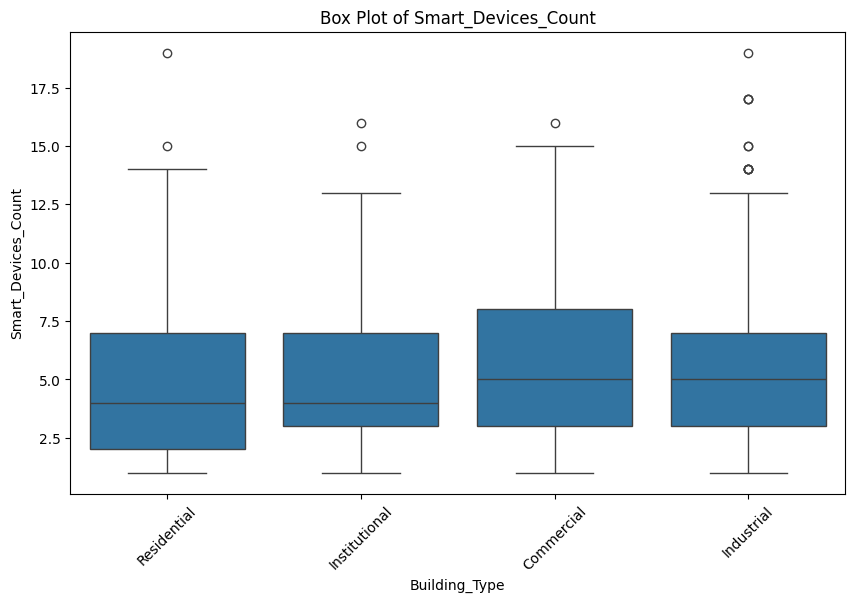

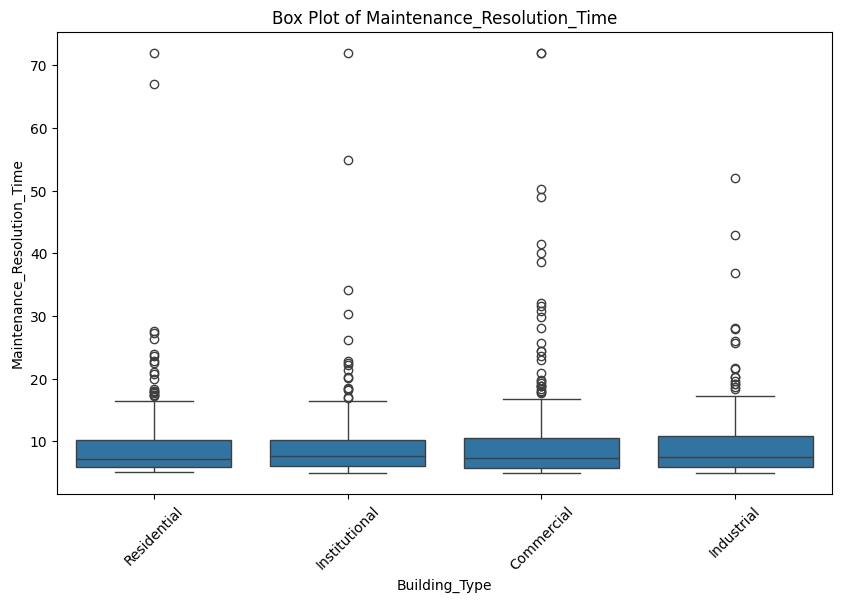

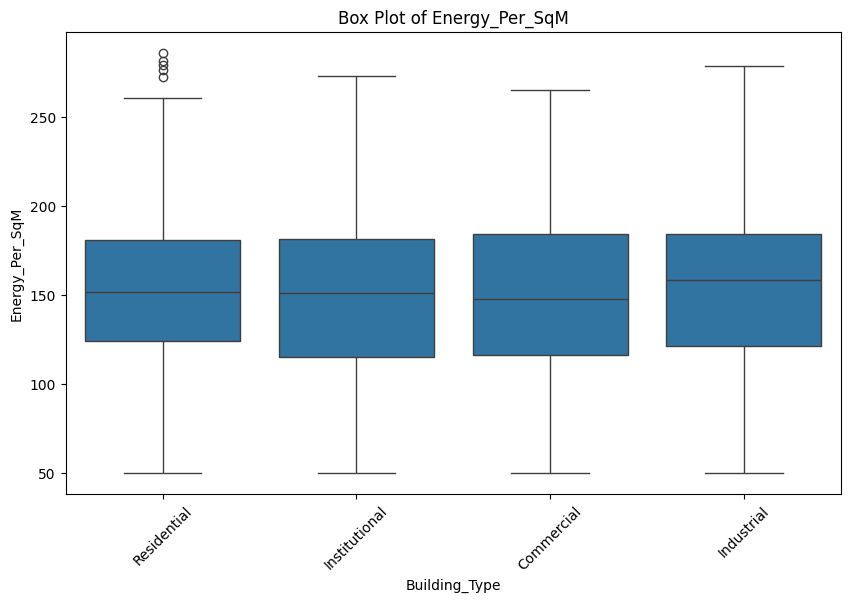

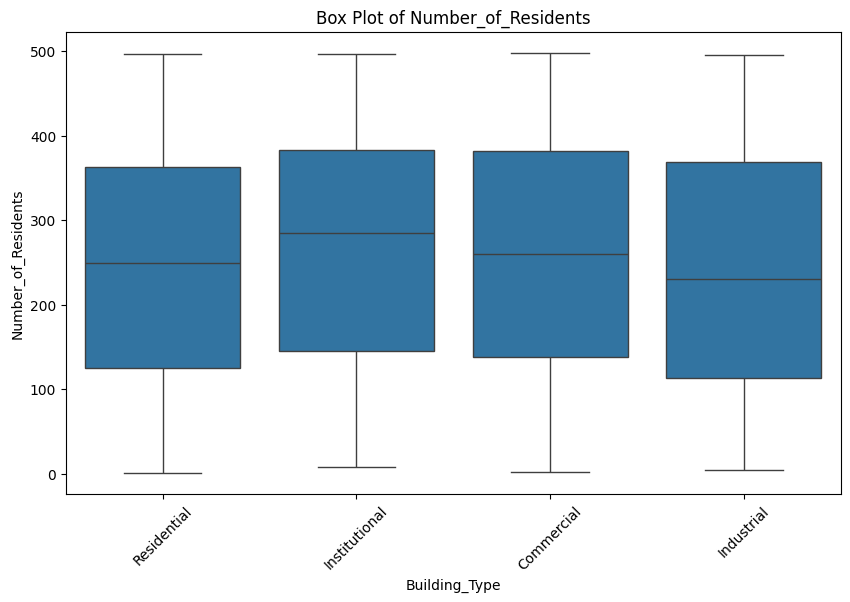

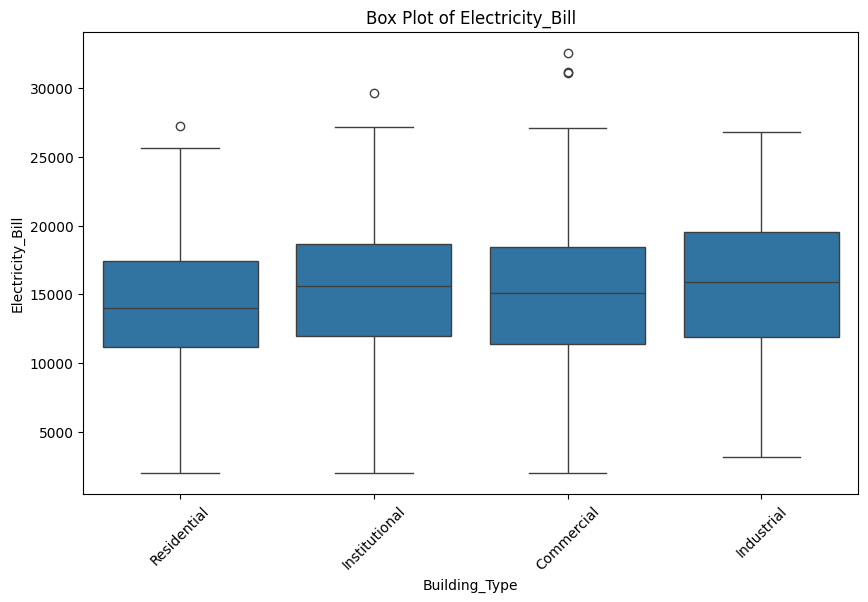

In [3]:
# Box plot for numerical features
numerical_features = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM', 
                       'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate', 
                       'Indoor_Air_Quality', 'Smart_Devices_Count', 'Maintenance_Resolution_Time', 
                       'Energy_Per_SqM', 'Number_of_Residents', 'Electricity_Bill']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Building_Type', y=feature, data=train_df)
    plt.title(f'Box Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

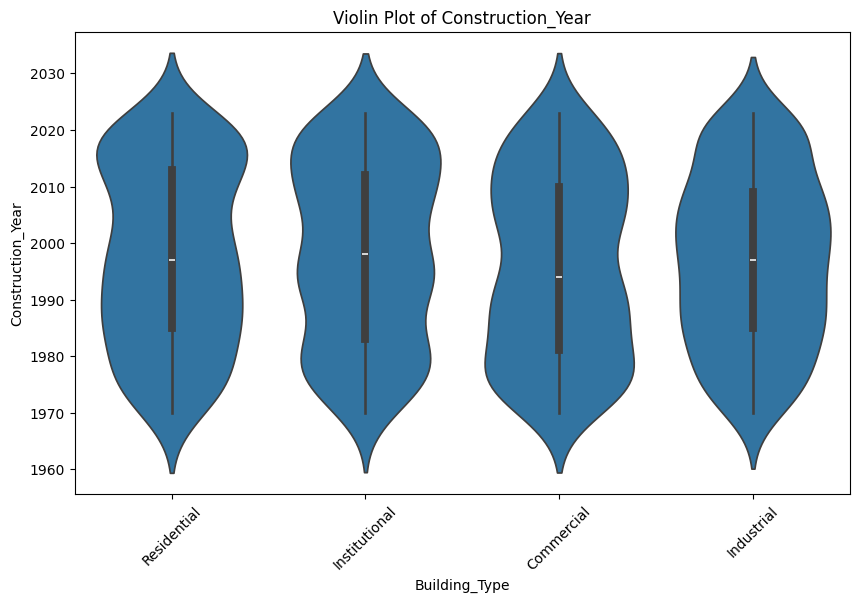

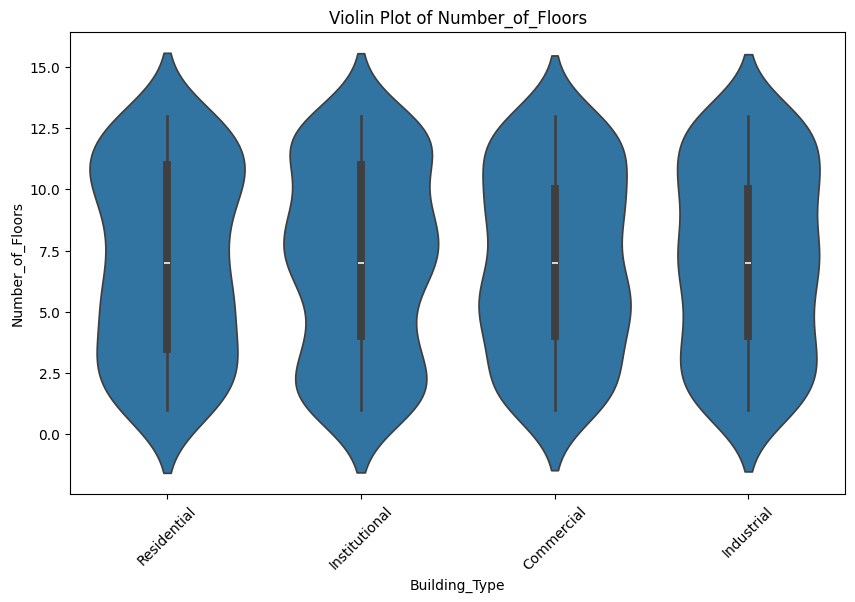

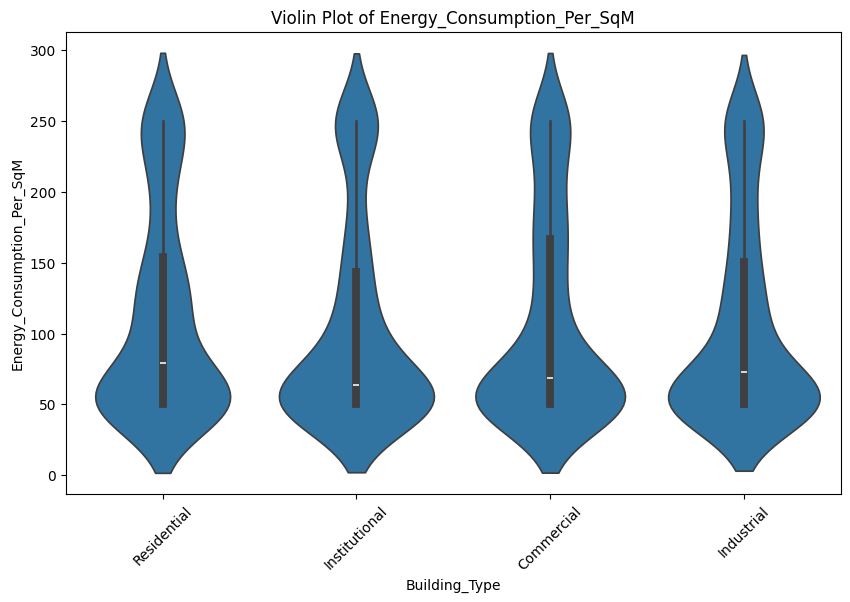

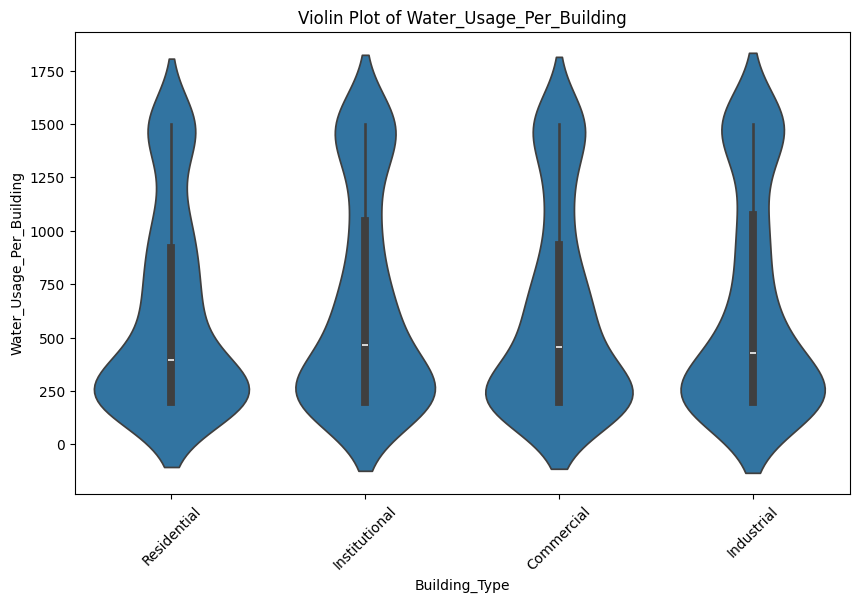

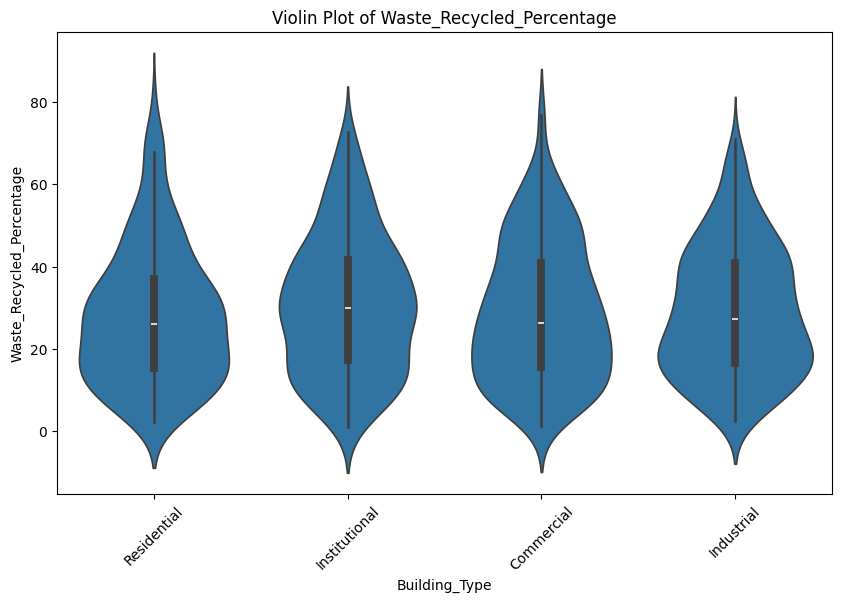

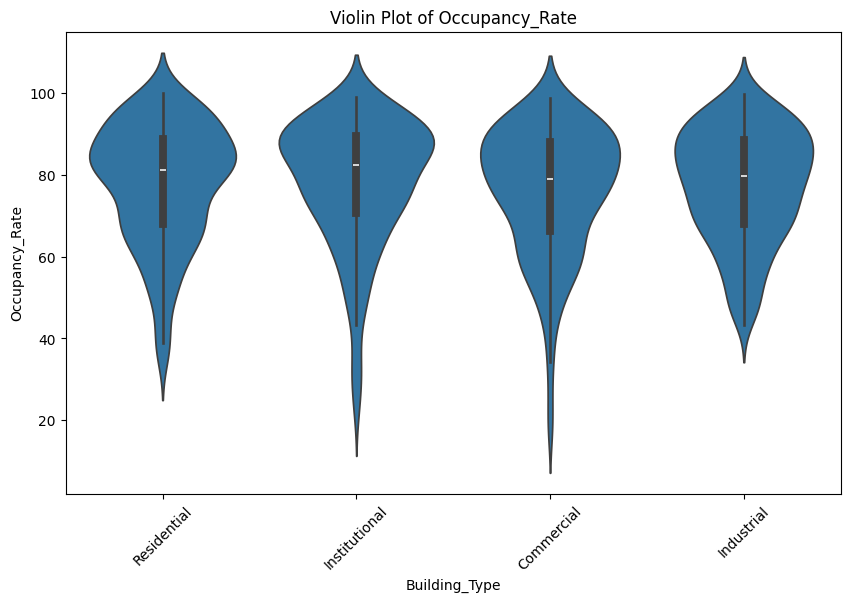

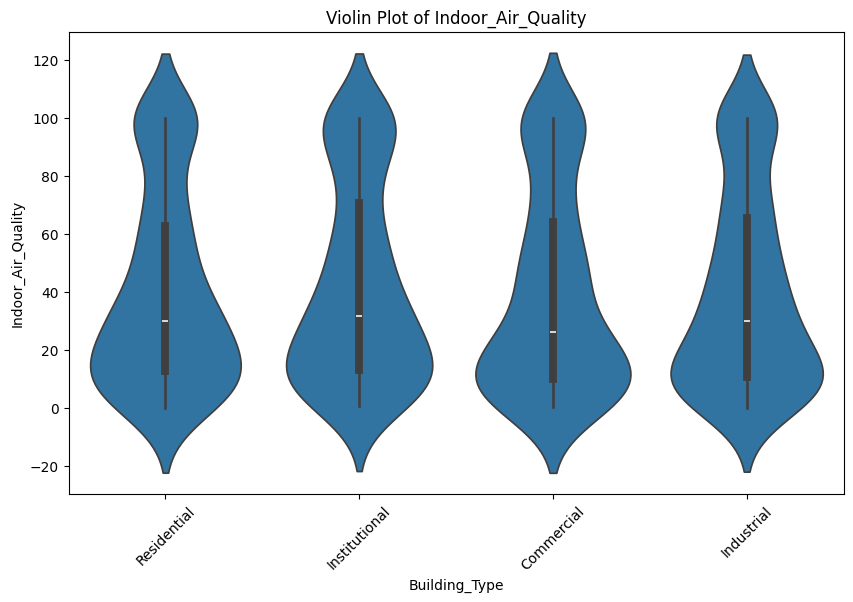

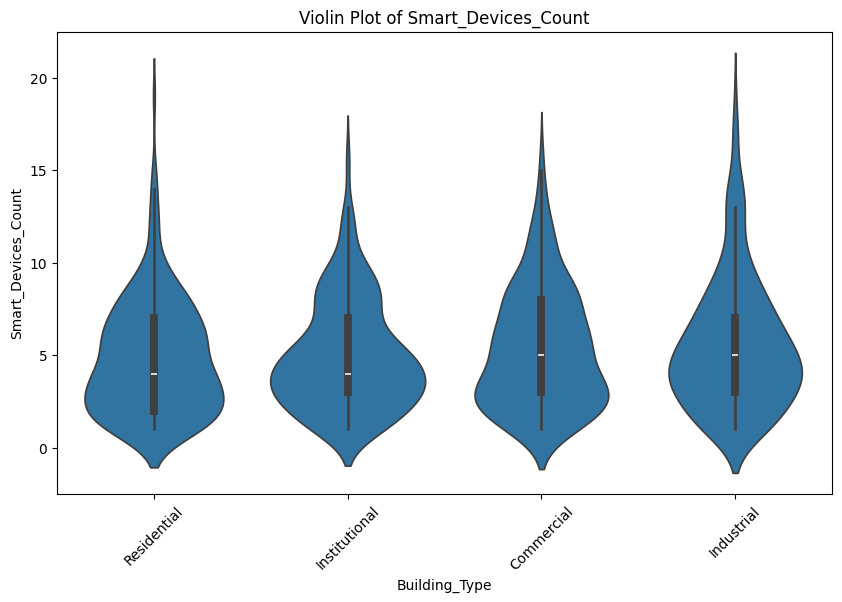

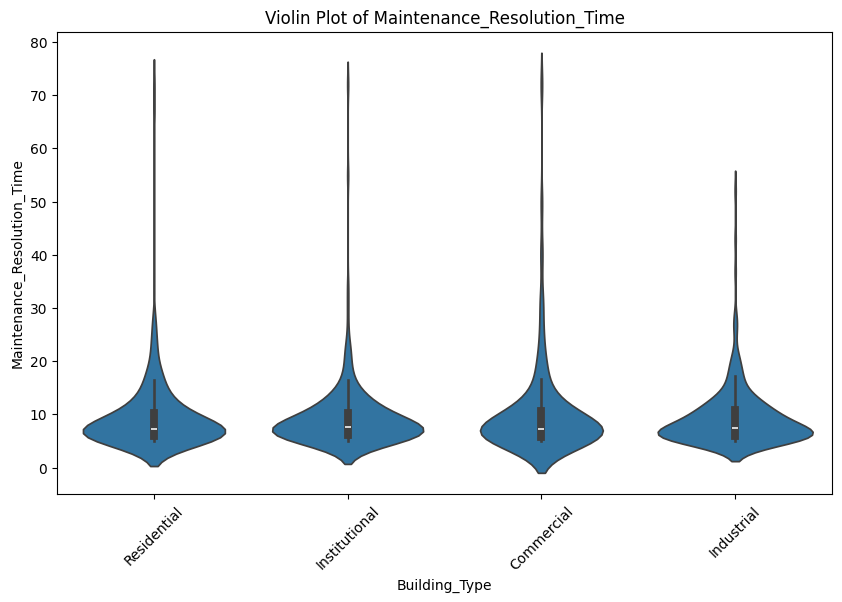

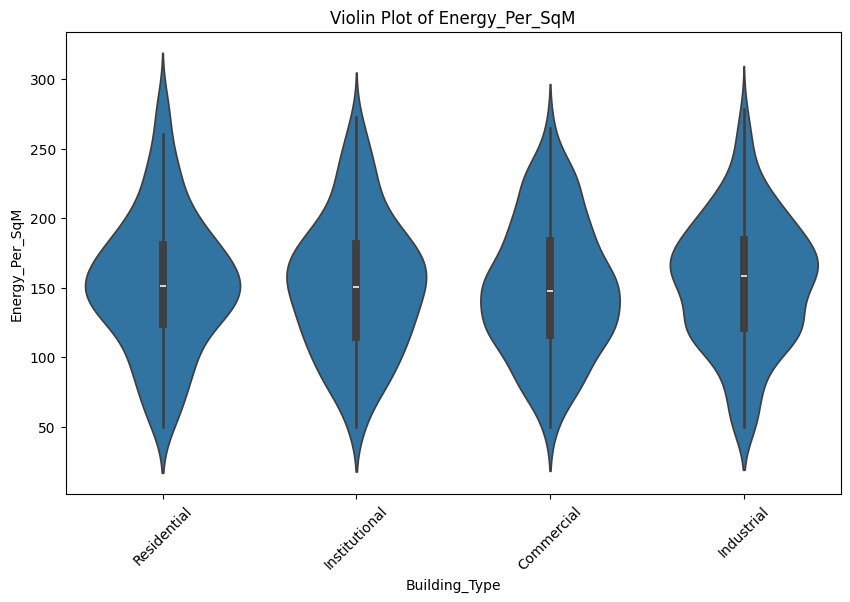

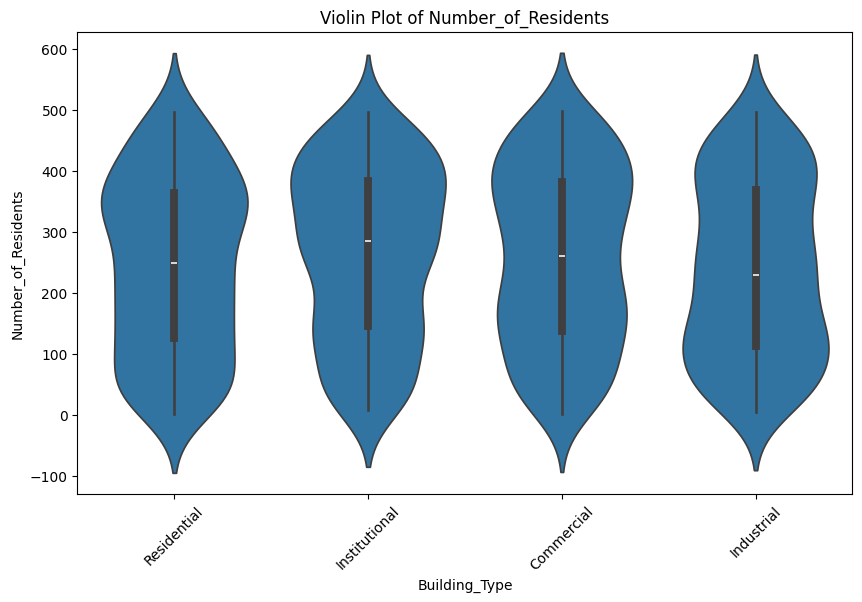

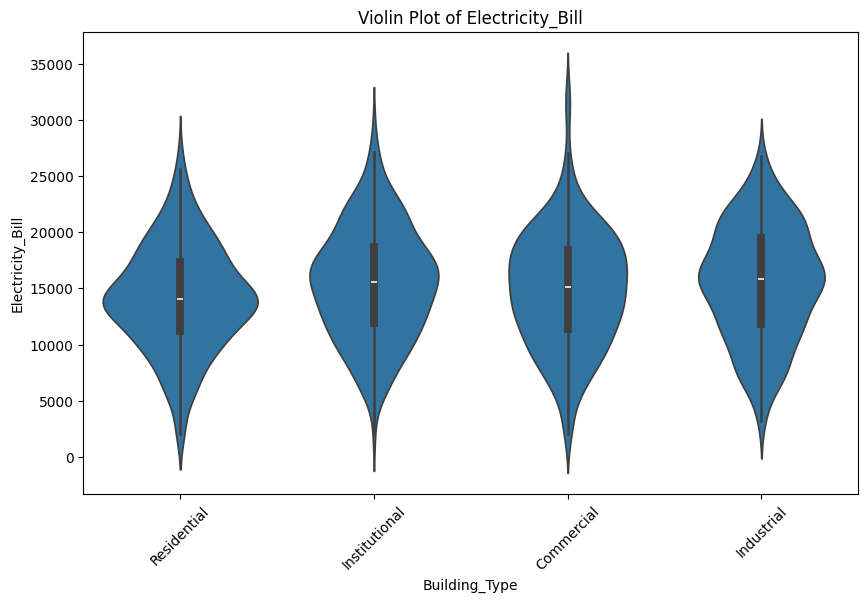

In [4]:
# Violin plot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Building_Type', y=feature, data=train_df)
    plt.title(f'Violin Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

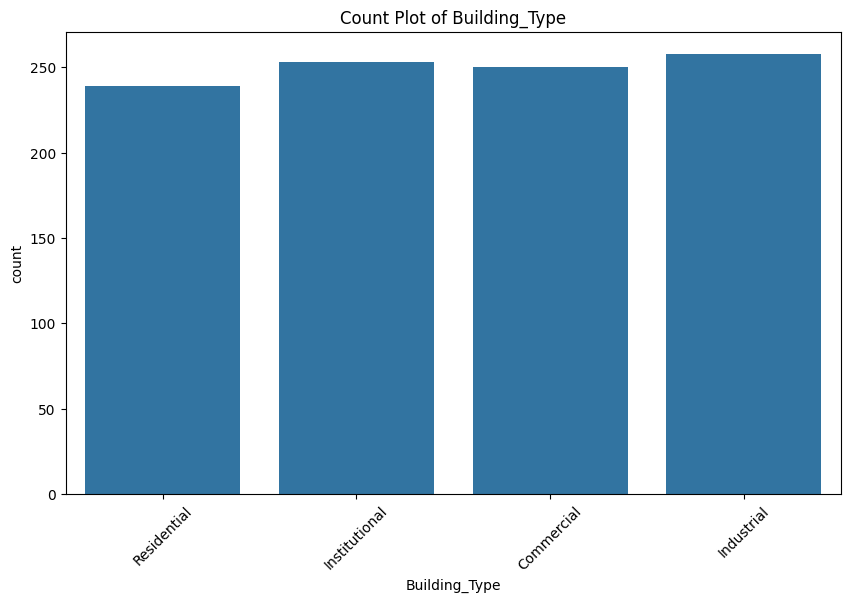

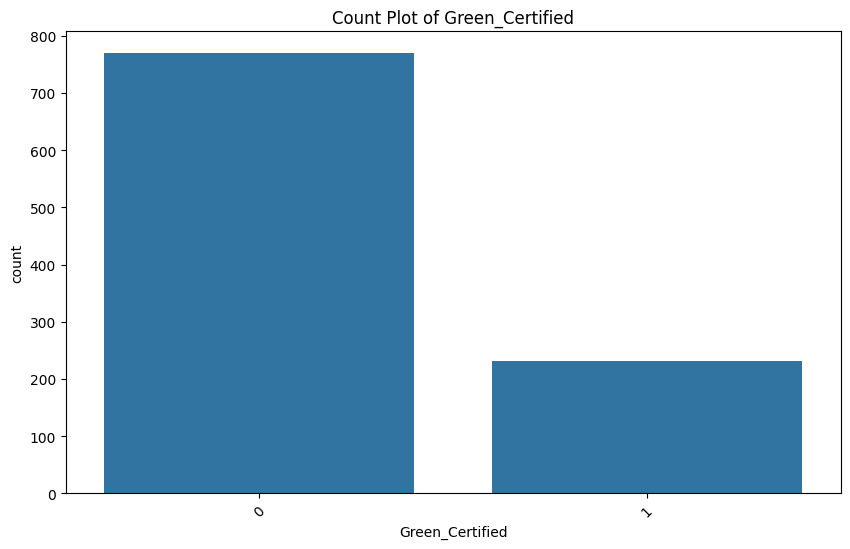

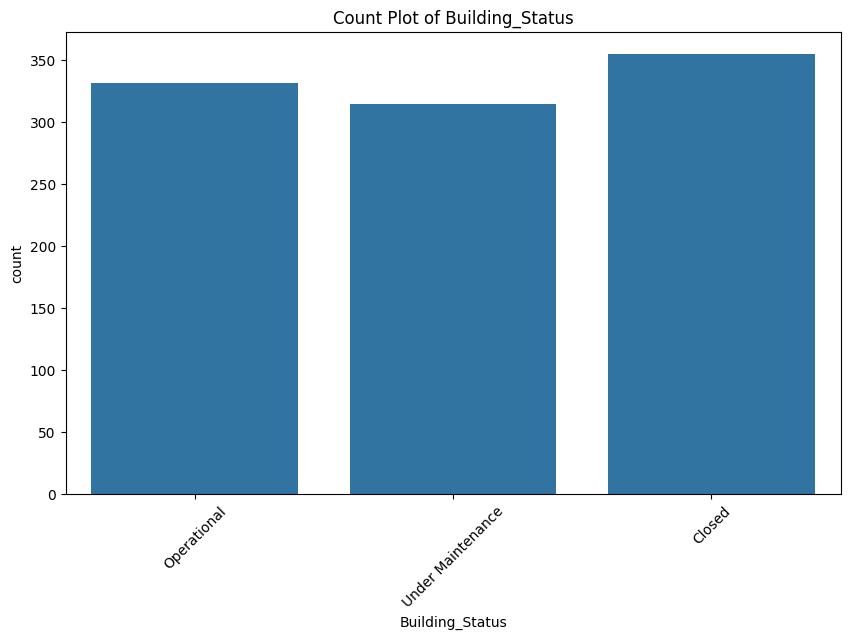

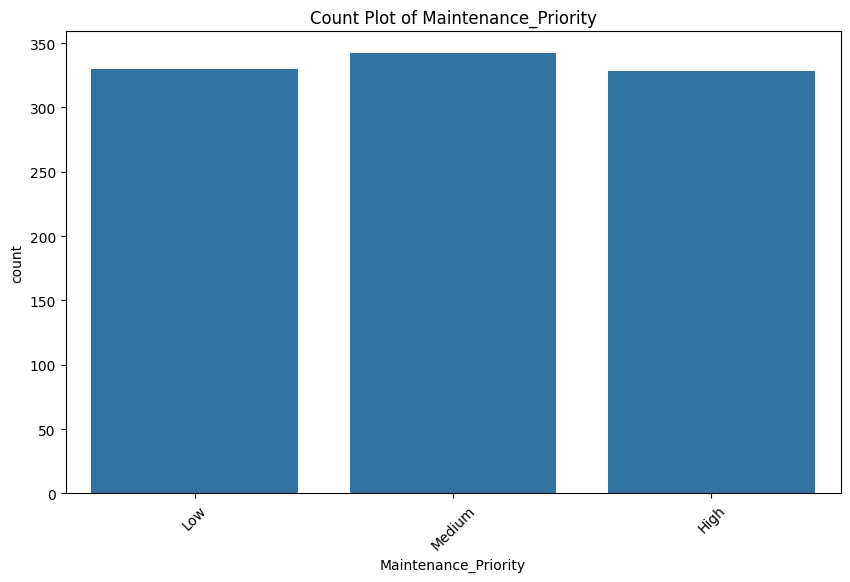

In [5]:
categorical_features = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

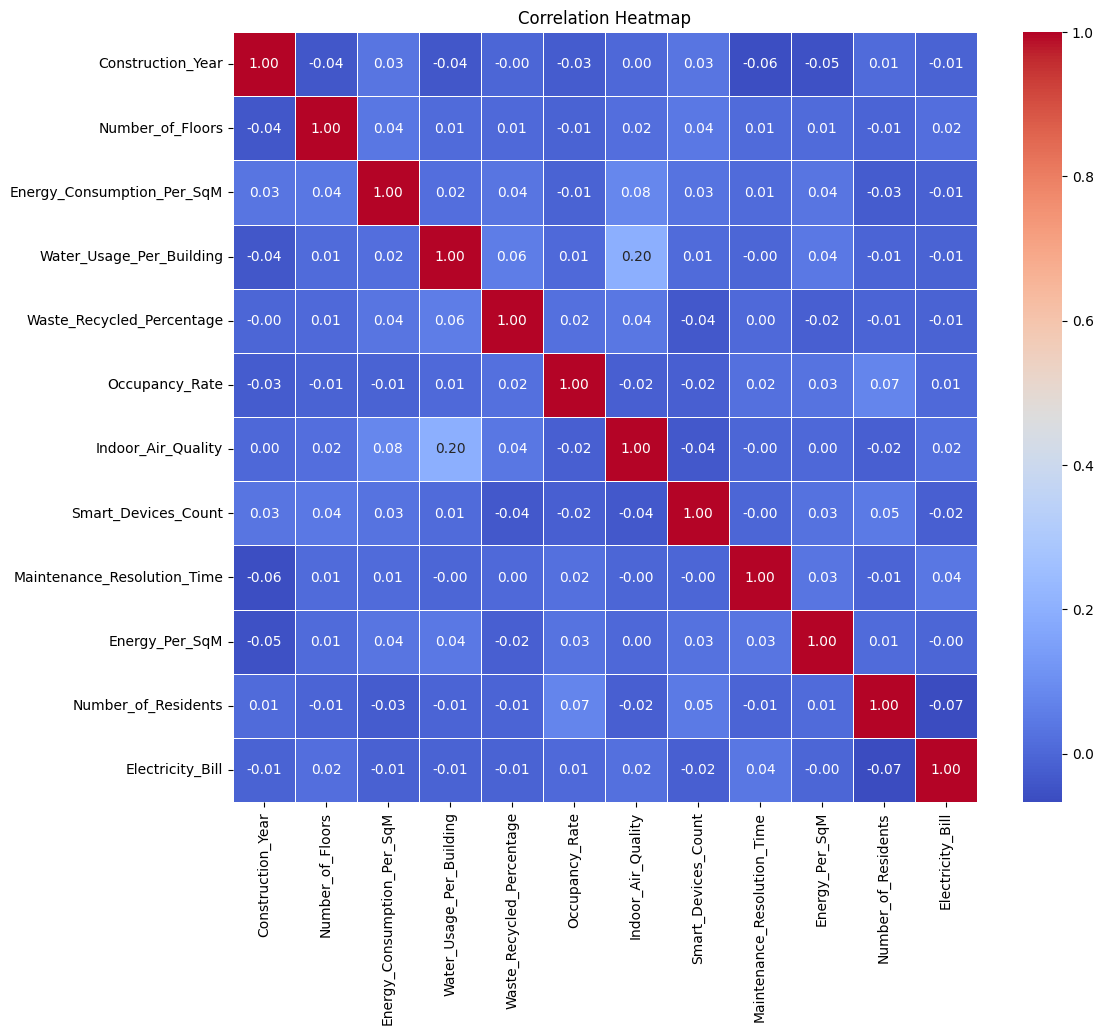

In [6]:
# Compute the correlation matrix
corr = train_df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. The pair plot will help identify which features have strong relationships with each other. For instance, a high correlation between Energy_Consumption_Per_SqM and Electricity_Bill would be expected.

2. The box plots and violin plots will show the distribution and spread of numerical features across different building types. For example, the Electricity_Bill might vary significantly between different building types.

3. Count plots for categorical features like Building_Type or Building_Status will reveal the distribution of these categories. For example, you might find that certain building types are more common in the dataset.

4. Box plots can help identify outliers in features like Electricity_Bill or Energy_Consumption_Per_SqM. Outliers might need further investigation.

5. The correlation heatmap will highlight strong positive or negative correlations between features, such as between Energy_Consumption_Per_SqM and Electricity_Bill.

## UMAP

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


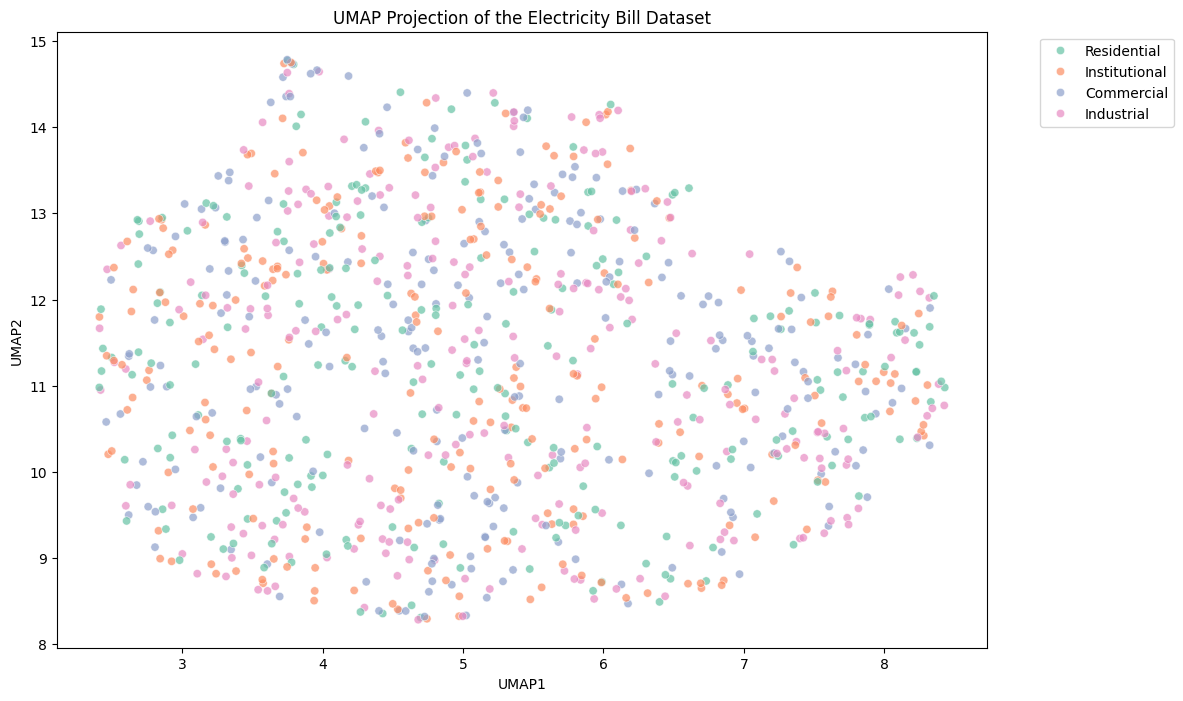

In [8]:
from sklearn.preprocessing import StandardScaler
import umap

df_numeric = train_df[numerical_features]

# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply UMAP for dimensionality reduction to 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
df_umap = umap_model.fit_transform(df_scaled)

# Create a DataFrame with UMAP results
df_umap_df = pd.DataFrame(df_umap, columns=['UMAP1', 'UMAP2'])

# Add the building type as a column for coloring in the plot
df_umap_df['Building_Type'] = train_df['Building_Type'].values

# Plot the UMAP results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Building_Type', data=df_umap_df, palette='Set2', alpha=0.7)
plt.title('UMAP Projection of the Electricity Bill Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Linear Regression